**Name: Yutika Rege**

**PRN: 1901202012**

**School: Data Science**

**Program: B.Sc. Data Science**

**Year/Semester: 2nd / 4th**

**Subject Name: Machine Learning 2**

**Subject Code: DS401**

**Aim/Objective:** Assign a cluster to each sub-species of the Iris flower based on input parameters.

**Apparatus/ Tools/Equipment/ Resources used:** Jupyter notebook, Lecture notes, Python and Machine Learning books, online resources from Google, dataset, Google Meet.

**Concept/Theory of Experiments:** 

1.	Exploratory data analysis

2.	Clustering algorithms

**Procedure:** 

1.	Import the essential libraries.

2.	Perform EDA on the Iris dataset. 

3.  Split the target feature for clustering from the independent feature.

4.  Note the output.

**Observations/Calculation/Result:** In the Jupyter Notebook.

**Conclusion:** K-Means clustering algorithm was applied on the Iris dataset to cluster the species and elbow method was applied to find optimal number of clusters.

-------------------------------------------------------------------------------------------------------------------------------

**Importing modules along with the built-in "Iris" dataset:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("talk")
%matplotlib inline
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
iris = sns.load_dataset("iris")

**Exploratory Data Analysis:**

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Text(0.5, 1.0, 'Boxplot for outlier detection')

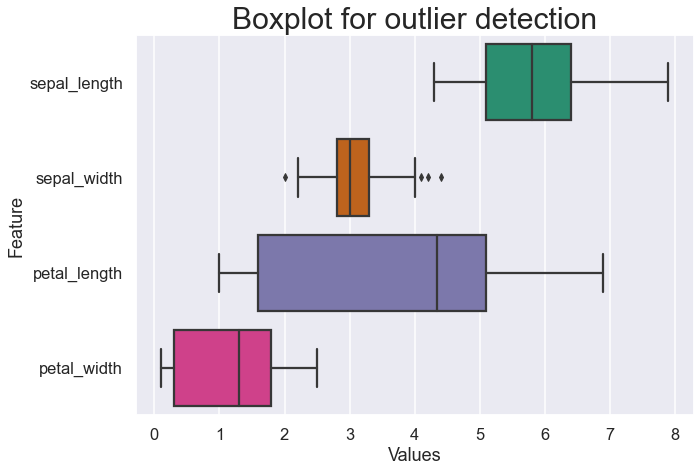

In [7]:
box = iris.iloc[:,:-1]
plt.figure(figsize=(10,7))
sns.boxplot(data=box,palette="Dark2",orient="h")
plt.xlabel("Values")
plt.ylabel("Feature")
plt.title("Boxplot for outlier detection",size=30)

In [8]:
iris["species"].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

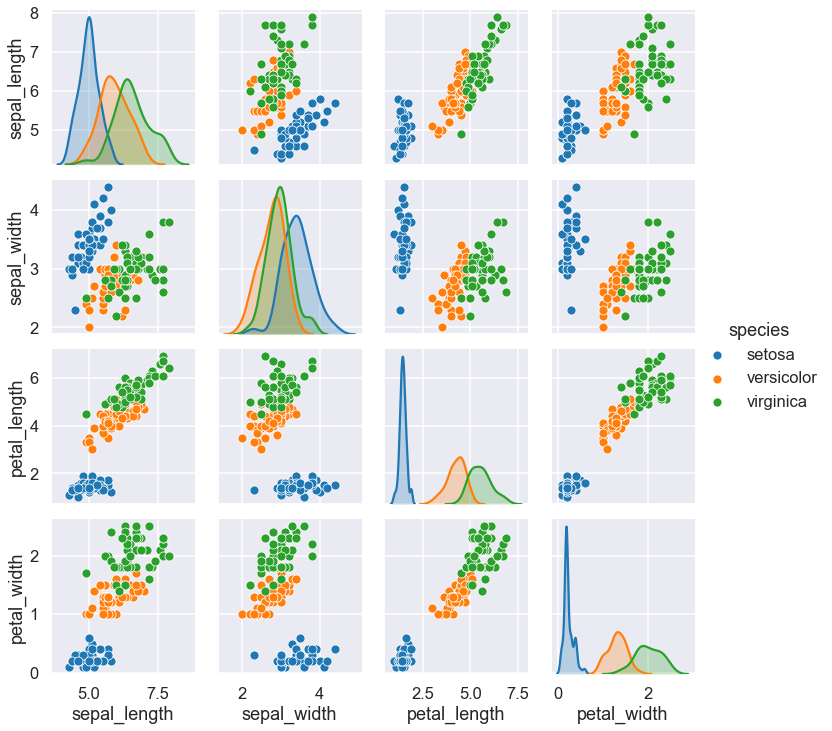

In [9]:
sns.pairplot(data=iris,hue="species")

**Inferences:**

**General EDA:-**

* There are 150 rows and 5 columns called 'sepal_length', 'sepal_width', 'petal_length', 'petal_width','species' in the dataset.

* There are no missing values.

* The only variable that has any outliers is sepal_width. 

**From the pairplot:-**

* There is a strong positive correlation between petal_width and petal_length and when factored by species, it seems like the species 'setosa' has a smaller petal width and length and virginica has the largest petal width and length.

* The same can't be said for sepal_length and sepal_width since they are not definite indicators of the type of species.

**Splitting the target and the independent features:**

In [10]:
from sklearn.preprocessing import LabelEncoder
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]
le = LabelEncoder()
y_enc= le.fit_transform(y)

In [11]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

**k-Means clustering:**

In [17]:
kmeans = KMeans(n_clusters=3)
y_km = kmeans.fit_predict(X)
y_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [18]:
k_values = [1,2,3,4,5,6,7,8]
wcss = []

for k in k_values:
    kmeans1 = KMeans(n_clusters=k)
    kmeans1.fit(X)
    wcss.append(kmeans1.inertia_)

ss_vals = pd.DataFrame(wcss,columns=["WCSS"])
ss_vals

,WCSS
0,681.370600
1,152.347952
2,78.851441
3,57.228473
4,46.472230
5,39.039987
6,34.530972
7,30.377379


Text(0, 0.5, 'Within Cluster Sum of Squares (WCSS)')

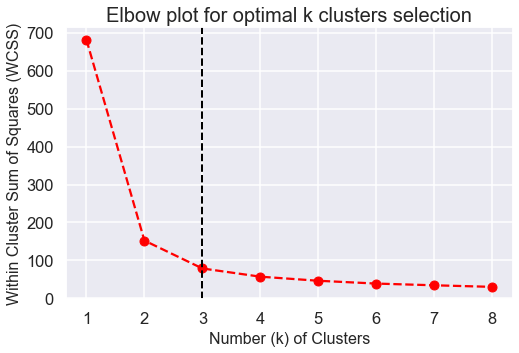

In [24]:
plt.figure(figsize=(8,5))
plt.plot(k_values,wcss,marker="o",color="r",ls="--")
plt.title("Elbow plot for optimal k clusters selection",size=20)
plt.xlabel("Number (k) of Clusters",size=16)
plt.axvline(x=3,ls="--",linewidth=2,c='k')
plt.ylabel("Within Cluster Sum of Squares (WCSS)",size=16)

**Comment:** Declared and fit the k-Means model on 3 clusters (assuming through prior knowledge). To confirm this assumption, plotted an elbow curve which clearly indicates that the optimal clusters for the Iris data is 3. 

**Evaluation of the model:**

In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy score of k-Means clustering:",round(accuracy_score(y_km,y_enc),4))

Accuracy score of k-Means clustering: 0.8933


**Conclusion:** After defining the number of clusters as 3, we can see that the accuracy score of the k-Means clustering algorithm on the Iris data is 0.8933 which is an above average score in terms of performance.